# mohammed godil hypothesis case study

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats

# business problem 1

In [202]:
loan = pd.read_csv('LoansData.csv')
loan

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,left,right,average
0,20000.0,20000.00,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year,735,739,737
1,19200.0,19200.00,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years,715,719,717
2,35000.0,35000.00,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years,690,694,692
3,10000.0,9975.00,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years,695,699,697
4,12000.0,12000.00,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years,695,699,697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,29950.00,16.77%,60 months,debt_consolidation,19.23%,NY,MORTGAGE,9250.00,705-709,15.0,45880.0,1.0,8 years,705,709,707
2496,16000.0,16000.00,14.09%,60 months,home_improvement,21.54%,MD,OWN,8903.25,740-744,18.0,18898.0,1.0,10+ years,740,744,742
2497,10000.0,10000.00,13.99%,36 months,debt_consolidation,4.89%,PA,MORTGAGE,2166.67,680-684,4.0,4544.0,0.0,10+ years,680,684,682
2498,6000.0,6000.00,12.42%,36 months,major_purchase,16.66%,NJ,RENT,3500.00,675-679,8.0,7753.0,0.0,5 years,675,679,677


In [203]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2499 non-null   float64
 1   Amount_Funded_By_Investors      2499 non-null   float64
 2   Interest_Rate                   2498 non-null   object 
 3   Loan_Length                     2500 non-null   object 
 4   Loan_Purpose                    2500 non-null   object 
 5   Debt_To_Income_Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home_Ownership                  2499 non-null   object 
 8   Monthly_Income                  2499 non-null   float64
 9   FICO_Range                      2500 non-null   object 
 10  Open_CREDIT_Lines               2497 non-null   float64
 11  Revolving_CREDIT_Balance        2497 non-null   float64
 12  Inquiries_in_the_Last_6_Months  24

In [204]:
ll = loan.Home_Ownership.value_counts().reset_index()
ll.iloc[0,0]

'MORTGAGE'

In [205]:
loan.Home_Ownership.fillna(ll.iloc[0,0],inplace = True)

In [206]:
loan.Home_Ownership.isna().sum()

0

In [207]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2499 non-null   float64
 1   Amount_Funded_By_Investors      2499 non-null   float64
 2   Interest_Rate                   2498 non-null   object 
 3   Loan_Length                     2500 non-null   object 
 4   Loan_Purpose                    2500 non-null   object 
 5   Debt_To_Income_Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home_Ownership                  2500 non-null   object 
 8   Monthly_Income                  2499 non-null   float64
 9   FICO_Range                      2500 non-null   object 
 10  Open_CREDIT_Lines               2497 non-null   float64
 11  Revolving_CREDIT_Balance        2497 non-null   float64
 12  Inquiries_in_the_Last_6_Months  24

In [208]:
loan.Interest_Rate = loan.Interest_Rate.str.strip('%').astype('float')

In [209]:
loan.Debt_To_Income_Ratio = loan.Debt_To_Income_Ratio.str.strip('%').astype('float')

In [210]:
loan.Amount_Funded_By_Investors.fillna(loan.Amount_Funded_By_Investors.mean(),inplace = True)

In [211]:
loan.Interest_Rate.fillna(method = 'ffill' , inplace = True)

In [212]:
stats.pearsonr(loan.Interest_Rate ,loan.Amount_Funded_By_Investors )

(0.3375548387955678, 1.1294452896812615e-67)

In [213]:
s1 = loan.loc[loan.Loan_Length == '36 months' , 'Interest_Rate']
s2= loan.loc[loan.Loan_Length == '60 months' , 'Interest_Rate']

In [214]:
stats.ttest_ind(s1,s2)

Ttest_indResult(statistic=-23.38550585767693, pvalue=1.5438552834846082e-109)

In [215]:
loan.Loan_Purpose.value_counts()

debt_consolidation    1307
credit_card            444
other                  201
home_improvement       152
major_purchase         101
small_business          87
car                     50
wedding                 39
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: Loan_Purpose, dtype: int64

In [216]:
l1 = loan.loc[loan.Loan_Purpose == 'debt_consolidation' , 'Interest_Rate']
l2 = loan.loc[loan.Loan_Purpose == 'credit_card' , 'Interest_Rate']
l3 = loan.loc[loan.Loan_Purpose == 'other' , 'Interest_Rate']
l4 = loan.loc[loan.Loan_Purpose == 'home_improvement' , 'Interest_Rate']
l6 = loan.loc[loan.Loan_Purpose == 'small_business' , 'Interest_Rate']
l7 = loan.loc[loan.Loan_Purpose == 'car' , 'Interest_Rate']
l8 = loan.loc[loan.Loan_Purpose == 'wedding' , 'Interest_Rate']
l9 = loan.loc[loan.Loan_Purpose == 'medical' , 'Interest_Rate']
l10 = loan.loc[loan.Loan_Purpose == 'moving' , 'Interest_Rate']
l11 = loan.loc[loan.Loan_Purpose == 'vacation' , 'Interest_Rate']
l12 = loan.loc[loan.Loan_Purpose == 'house' , 'Interest_Rate']
l13 = loan.loc[loan.Loan_Purpose == 'educational' , 'Interest_Rate']
l14 = loan.loc[loan.Loan_Purpose == 'renewable_energy' , 'Interest_Rate']
l5 = loan.loc[loan.Loan_Purpose == 'major_purchase' ,'Interest_Rate' ]

In [217]:
print(l1.mean(),l2.mean(),l3.mean(),l4.mean(),l5.mean(),l6.mean(),l7.mean(),l8.mean(),l9.mean(),l10.mean(),l11.mean(),l12.mean(),l13.mean(),l14.mean())

13.586916602907444 13.05353603603601 13.159552238805967 11.594276315789479 10.797821782178215 12.839195402298845 11.113000000000001 12.181025641025643 11.649666666666668 13.621034482758622 11.966190476190476 13.448000000000002 11.007333333333332 9.8775


In [218]:
stats.f_oneway(l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,l11,l12,l13,l14)

F_onewayResult(statistic=7.441618411459153, pvalue=1.4572911836997953e-14)

In [219]:
loan.Home_Ownership.value_counts()

MORTGAGE    1148
RENT        1146
OWN          200
OTHER          5
NONE           1
Name: Home_Ownership, dtype: int64

In [220]:
a1 = loan.loc[loan.Home_Ownership == 'MORTGAGE' , 'average']
a2 = loan.loc[loan.Home_Ownership == 'RENT' , 'average']
a3 = loan.loc[loan.Home_Ownership == 'OWN' , 'average']
a4 = loan.loc[loan.Home_Ownership == 'OTHER' , 'average']
a5 = loan.loc[loan.Home_Ownership == 'NONE' , 'average']

In [221]:
stats.f_oneway(a1,a2,a3,a4,a5)

F_onewayResult(statistic=14.497099613608103, pvalue=1.0458682945447822e-11)

# business problem 2

In [222]:
price = pd.read_csv('Price_Quotes.csv')
price

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129
5,6,136,119
6,7,94,97
7,8,103,104
8,9,140,127
9,10,152,133


In [223]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Order_Number  12 non-null     int64
 1   Barry_Price   12 non-null     int64
 2   Mary_Price    12 non-null     int64
dtypes: int64(3)
memory usage: 416.0 bytes


In [224]:
stats.ttest_ind(price.Barry_Price,price.Mary_Price)

Ttest_indResult(statistic=1.4147436739281787, pvalue=0.17114226132118285)

In [225]:
a = price.Barry_Price

In [226]:
b = price.Mary_Price

In [227]:
stats.f_oneway(a,b)

F_onewayResult(statistic=2.0014996629198025, pvalue=0.17114226132118274)

# business problem 3

In [228]:
treat = pd.read_csv('Treatment_Facility.csv')
treat

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.000000
7,8,Prior,11.4286,31.250000,25.000000
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0000,16.574586,16.574586


In [229]:
treat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              20 non-null     int64  
 1   Reengineer         20 non-null     object 
 2   Employee_Turnover  20 non-null     float64
 3   VAR4               20 non-null     float64
 4   VAR5               20 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 928.0+ bytes


In [230]:
test1 = treat.loc[treat.Reengineer == 'Prior','Employee_Turnover' ]
test2 = treat.loc[treat.Reengineer == 'Post' ,'Employee_Turnover']

In [231]:
stats.ttest_ind(test1,test2)

Ttest_indResult(statistic=-1.770306704753604, pvalue=0.09361109345535304)

In [232]:
stats.f_oneway(test1,test2)

F_onewayResult(statistic=3.133985828895568, pvalue=0.09361109345535291)

In [233]:
t1 = treat.loc[treat.Reengineer == 'Prior','VAR5' ]
t2 = treat.loc[treat.Reengineer == 'Post' ,'VAR5']

In [234]:
stats.ttest_ind(t1,t2)

Ttest_indResult(statistic=1.6279144253528646, pvalue=0.12091989189884149)

In [235]:
stats.f_oneway(t1,t2)

F_onewayResult(statistic=2.650105376271948, pvalue=0.12091989189884142)

# business problem 4

In [236]:
priority = pd.read_csv('Priority_Assessment.csv')
priority

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium
...,...,...
637,2.5,Low
638,0.3,High
639,0.3,Medium
640,1.3,Medium


In [237]:
priority.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Days      642 non-null    float64
 1   Priority  642 non-null    object 
dtypes: float64(1), object(1)
memory usage: 10.2+ KB


In [238]:
s1 = priority.loc[priority.Priority == 'High','Days']
s2 = priority.loc[priority.Priority == 'Low','Days']
s3 = priority.loc[priority.Priority == 'Medium','Days']

In [239]:
s1.mean()
s2.mean()
s3.mean()

2.5000000000000004

In [240]:
stats.f_oneway(s1,s2,s3)

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

# business problem 5

In [45]:
film = pd.read_csv('Films.csv')
film

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About,Gender.1,marital_status
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5,female,married
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5,female,single
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5,male,married
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5,female,married
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1,female,married
...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1,female,single
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5,male,married
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5,female,married
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3,male,married


In [46]:
film.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _rowstate_      330 non-null    int64  
 1   Movie           330 non-null    object 
 2   Gender          330 non-null    object 
 3   Marital_Status  328 non-null    object 
 4   Sinage          328 non-null    float64
 5   Parking         328 non-null    float64
 6   Clean           327 non-null    float64
 7   Overall         328 non-null    float64
 8   Age             328 non-null    float64
 9   Income          314 non-null    float64
 10  Hear_About      323 non-null    object 
 11  Gender.1        330 non-null    object 
 12  marital_status  330 non-null    object 
dtypes: float64(6), int64(1), object(6)
memory usage: 33.6+ KB


In [47]:
film.columns =['_rowstate_', 'Movie', 'Gender', 'Marital_Status', 'Sinage', 'Parking',
       'Clean', 'Overall', 'Age', 'Income', 'Hear_About', 'Gender_1',
       'marital_status']

### What is the overall level of customer satisfaction?

In [48]:
print('MEAN                ',film.Overall.mean())
print('STANDARD DEVIATION  ',film.Overall.std())
print('STANDARD ERROR      ',film.Overall.std() / np.sqrt(330))

MEAN                 1.6189024390243902
STANDARD DEVIATION   0.6892863057161788
STANDARD ERROR       0.03794396231956619


In [49]:
print(film.Overall.mean() - 1.960 * film.Overall.std() / np.sqrt(330) )
print(film.Overall.mean() + 1.960 * film.Overall.std() / np.sqrt(330) )

1.5445322728780404
1.69327260517074


as per the sample data the average satisfaction is between 1 and 2 which indicates that viewers are  happy . but for the population we can 95 % confidently say that the entire population's satisfaction is between 1.5445322728780404 and 1.69327260517074

### What is the demographic profile of Film on the Rocks patrons?

In [53]:
film.marital_status = np.where(film.marital_status == '0',film.marital_status.mode()[0],film.marital_status)

In [71]:
gender = film.Gender_1.value_counts()
gender

female    213
male      117
Name: Gender_1, dtype: int64

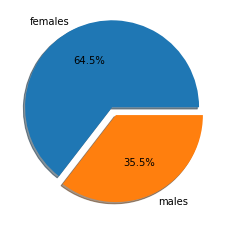

In [97]:
plt.pie(gender , autopct='%.1f%%',labels= ['females','males'],explode = (0.1,0), shadow=True)
plt.show()

In [74]:
marital_status = film.marital_status.value_counts()
marital_status

single     230
married    100
Name: marital_status, dtype: int64

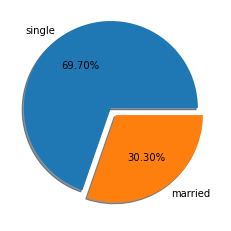

In [95]:
plt.pie(marital_status , autopct='%.2f%%',labels= ['single','married'],shadow=True,explode = (0.1,0))
plt.show()

In [78]:
age = film.Age.value_counts()
age

2.0    175
3.0    117
1.0     26
4.0     10
Name: Age, dtype: int64

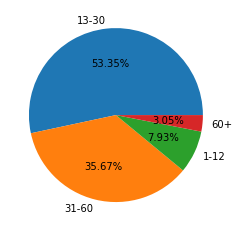

In [100]:
plt.pie(age , autopct='%.2f%%',labels= ['13-30','31-60','1-12','60+'])
plt.show()

In [105]:
income = film.Income.value_counts()
income

1.0    142
3.0     90
2.0     82
Name: Income, dtype: int64

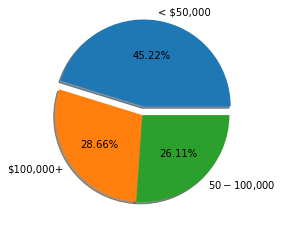

In [111]:
plt.pie(income ,labels = ['< $50,000' , '$100,000+' , '$50-$100,000'] , autopct = '%.2f%%' , shadow= True ,explode = (0.1,0,0))
plt.show()

### In what media outlet(s) should the film series be advertised?

In [119]:
film.Hear_About.fillna(film.Hear_About.mode()[0],inplace = True)

In [126]:
film['film_encoding'] =     np.where(film.Hear_About == '1' , 'television',
                            np.where(film.Hear_About == '2','newspaper',
                            np.where(film.Hear_About == '3','radio',
                            np.where(film.Hear_About == '4','website',
                            np.where(film.Hear_About == '5','word of mouth',
                            np.where(film.Hear_About == '1,5','television & word of mouth',
                            np.where(film.Hear_About == '2,5','newspaper & word of mouth',
                            np.where(film.Hear_About == '3,4','radio & website',
                            np.where(film.Hear_About == '3,5','radio & word of mouth',
                            np.where(film.Hear_About == '4,5','website & word of mouth',
                            np.where(film.Hear_About == '5,4','word of mouth & website',np.nan)))))))))))

In [193]:
aw = film.film_encoding.value_counts()
aw

word of mouth                 233
website                        41
television                     22
radio                          14
newspaper                      12
newspaper & word of mouth       2
radio & website                 2
website & word of mouth         1
television & word of mouth      1
word of mouth & website         1
radio & word of mouth           1
Name: film_encoding, dtype: int64

In [200]:
yy = aw.sum()
aw.apply(lambda x : round(x/yy * 100,2))

word of mouth                 70.61
website                       12.42
television                     6.67
radio                          4.24
newspaper                      3.64
newspaper & word of mouth      0.61
radio & website                0.61
website & word of mouth        0.30
television & word of mouth     0.30
word of mouth & website        0.30
radio & word of mouth          0.30
Name: film_encoding, dtype: float64

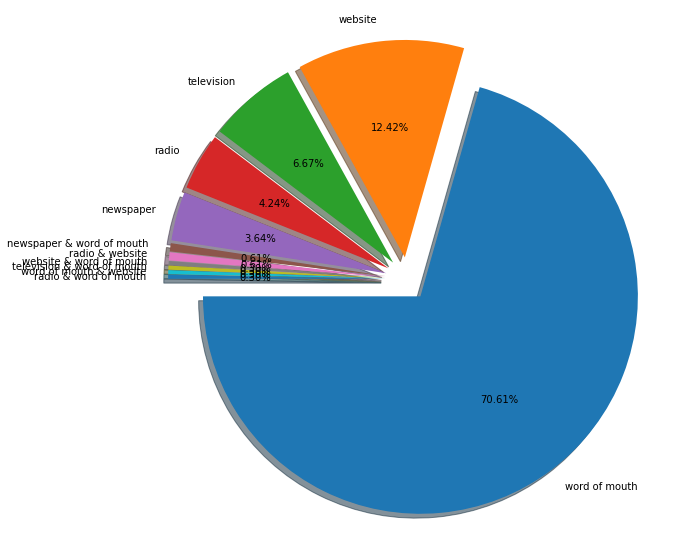

In [201]:
distance = 0.1
separate = (distance, distance, distance, distance, distance, distance,distance,distance,distance,distance,distance)
plt.figure(figsize= (10,10))
plt.pie(aw ,autopct = '%.2f%%' , shadow= True,labels = ['word of mouth','website','television',
                                                                                 'radio','newspaper' ,'newspaper & word of mouth',
                                                                                 'radio & website',
                                                                                 'website & word of mouth','television & word of mouth',
                                                                                 'word of mouth & website','radio & word of mouth'] ,labeldistance= 1.1,startangle=180,explode = separate)#explode = (0.4,0,0,0,0,0,0,0,0,0,0) )
plt.show()                

####  as per the pie chart it can be concluded that film series should be advertised with word of mouth.

#### What factors are linked to satisfaction?
